**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import \
    NeighborsBase, KNeighborsMixin,\
    RadiusNeighborsMixin, SupervisedIntegerMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

In [3]:
def numpy_dist(X, Y):
    """Функция, считающая попарные расстояния между строчками матриц X, Y.

    Идейно должна лежать в каком-нибудь отдельном файле типа untils.py.
    """

    x_dist = (X ** 2).sum(axis=1)
    y_dist = (Y ** 2).sum(axis=1)
    xy_dist = X.dot(Y.T)
    dist = -2 * xy_dist + y_dist + x_dist.reshape(-1, 1)

    """Из математических соображений не могло получиться отрицательных
    значений, поэтому обнулим их, чтобы не возникало ошибок."""
    return np.sqrt(np.where(dist < 0, 0, dist))


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    """Данный класс представляет собой реализацию метода ближайших соседей.

    В качестве основной метрики используется евклидова метрика.
    """

    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        """Обучаем выборку.
            В качестве train data берем X.
            В качестве target values берем y.

            Требования к X -- numpy.ndarray размерности не более двух.
            Требования к y -- numpy.ndarray размерности 1.
            """

        isXarr = isinstance(X, np.ndarray)
        isyarr = isinstance(y, np.ndarray)
        if not (isXarr and isyarr) or X.ndim > 2 or y.ndim != 1:
            raise Exception('Wrong format of X,y')

        if X.ndim == 1:
            self.X_ = X.reshape(X.shape[0], 1)
        else:
            self.X_ = X

        self.y_ = y
        self.classes_ = np.unique(y)

    def predict(self, X):
        """Predict the class labels for the provided data

        Parameters
        ----------
        X : array-like, shape (n_query, n_features),
            Test samples.

        Returns
        -------
        y : array of shape [n_samples]
            Class labels for each data sample.
        """

        isXarr = isinstance(X, np.ndarray)
        if not isXarr or X.ndim != 2 or X.shape[1] != self.X_.shape[1]:
            raise Exception('Wrong format of X')

        classesNeighbors = self._getKNeighborsClasses(X)
        return np.array(stats.mode(classesNeighbors, axis=1))[0].ravel()

    def predict_proba(self, X):
        classesNeighbors = self._getKNeighborsClasses(X)

        probs = []
        for cur_class in self.classes_:
            probs.append(np.sum(cur_class == classesNeighbors, axis=1))

        return np.array(probs).T / self.n_neighbors

    def score(self, X, y):
        return np.average(self.predict(X) == y)

    def _getKNeighborsClasses(self, X, n_neighbors=None):
        """Функция возвращает классы k ближайших соседей"""

        if n_neighbors is None:
            n_neighbors = self.n_neighbors

        pairwise_dist = numpy_dist(X, self.X_)
        neigborsIndexes = np.argsort(pairwise_dist, axis=1)[:, : n_neighbors]
        return self.y_[neigborsIndexes]

**IRIS**

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target, random_state = 45)

In [6]:
clf = KNeighborsClassifier(n_neighbors=4)
my_clf = MyKNeighborsClassifier(n_neighbors=4)

In [7]:
%time clf.fit(X_train, y_train)

CPU times: user 917 µs, sys: 195 µs, total: 1.11 ms
Wall time: 978 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

CPU times: user 349 µs, sys: 92 µs, total: 441 µs
Wall time: 370 µs


In [9]:
%time clf.predict(X_test)

CPU times: user 1.03 ms, sys: 84 µs, total: 1.11 ms
Wall time: 1.1 ms


array([1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2])

In [10]:
%time my_clf.predict(X_test)

CPU times: user 746 µs, sys: 367 µs, total: 1.11 ms
Wall time: 777 µs


array([1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2])

In [11]:
%time clf.predict_proba(X_test)

CPU times: user 487 µs, sys: 11 µs, total: 498 µs
Wall time: 504 µs


array([[0.  , 0.5 , 0.5 ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.  , 1.  ]])

In [12]:
%time my_clf.predict_proba(X_test)

CPU times: user 884 µs, sys: 702 µs, total: 1.59 ms
Wall time: 954 µs


array([[0.  , 0.5 , 0.5 ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.  , 1.  ]])

In [13]:
clf.score(X_test, y_test)

0.8666666666666667

In [14]:
my_clf.score(X_test, y_test)

0.8666666666666667

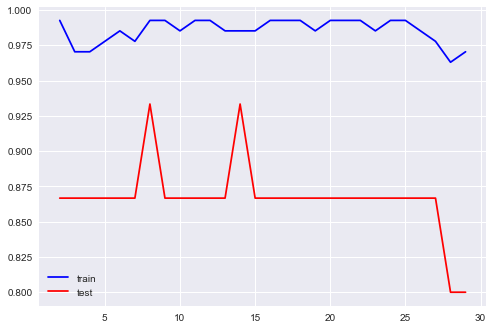



Максимальное значение score достигается при количестве соседей равным 6


In [15]:
# Задание 3

errors_train = []
errors_test = []
neighbors_range = range(2, 30)
for k in neighbors_range:
    my_knn = MyKNeighborsClassifier(k)
    my_knn.fit(X_train, y_train)

    errors_train.append(my_knn.score(X_train, y_train))
    errors_test.append(my_knn.score(X_test, y_test))

plt.plot(neighbors_range, errors_train, color='blue', label='train')
plt.plot(neighbors_range, errors_test, color='red', label='test')
plt.legend()
plt.show()
print("\n\nМаксимальное значение score достигается "
      "при количестве соседей равным", np.argmax(errors_test))

**MNIST**

In [ ]:
ABC = fetch_mldata('MNIST original')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [16]:
"""К сожалению, у меня не заработала fetch_mldata, поэтому использовал 
следующий код для работы с данными. Для его выполнения должен стоять
пакет tensorflow
"""

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

X_train, X_test, y_train, y_test = train_test_split(mnist.train.images, mnist.train.labels, test_size=0.1, stratify=mnist.train.labels)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 20.7 s, sys: 299 ms, total: 21 s
Wall time: 21.3 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.78 ms, sys: 513 µs, total: 2.29 ms
Wall time: 1.33 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 5min 3s, sys: 2.44 s, total: 5min 5s
Wall time: 5min 10s


array([4, 2, 7, ..., 1, 3, 6], dtype=uint8)

In [21]:
%time my_clf.predict(X_test)

CPU times: user 37.4 s, sys: 6.61 s, total: 44 s
Wall time: 39.1 s


array([4, 2, 7, ..., 1, 3, 6])

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 5min 2s, sys: 2.54 s, total: 5min 5s
Wall time: 5min 9s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 37.9 s, sys: 6.77 s, total: 44.7 s
Wall time: 40.3 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.97

In [25]:
my_clf.score(X_test, y_test)

0.97

Задание 5

In [ ]:
# seaborn
'''
Seaborn - это питоновская библиотека для визуалиции данных, имеющая в 
качестве основы matplotlib. Представляет собой высокоуровневый инструмент 
для рисования привлекательных статистических графиков. 
'''

# matplotlib
'''
Matplotlib - это питоновская библитека для создания 2D изображений графиков, 
различного рода фигур и интерактивных окружений. 
'''

# train_test_split
'''
Разбивает массив данных или матрицу на тренировочное и тестовое подмножества.
'''

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
'''
Pipeline может быть использован, чтобы соединить несколько алгоритмов (или методов) в один.
Pipeline - вещь нужная, так как часто существует вполне определенная последовательность щагов в обработке
данных, например, отбор значимых признаков, нормировка и классификация. 
'''

# StandardScaler (from sklearn.preprocessing import StandardScaler)
'''
StandardScaler нужен для стандартизации признаков. Алгоритм прост: вычитаем среднее
и нормируем до единичной дисперсии.
'''

# ClassifierMixin
'''
Класс - "примесь" с одним методом score. Нужен для подсчета числовой характеристики 
работоспособности метода классификации. 
'''

# NeighborsBase
'''
Класс-основа для всех вариаций метода ближайших соседей. 
'''

# KNeighborsMixin
'''
Класс - "примесь" для поиска k ближайших соседей. 
Имеет два метода: 
1. def kneighbors(self, X=None, n_neighbors=None, return_distance=True) 
        Находит K соседей данной точки
2. def kneighbors_graph(self, X=None, n_neighbors=None,
                         mode='connectivity')
        Вычисляет (взвешенный) граф k-cоседей для точек из X
'''

# SupervisedIntegerMixin
'''
Класс - "примесь" с одним единственным методом fit(self, X, y), предназначенной для обучения
модели, использующую X как train data, а y как target values
'''